## Cleaning Steam Combined Datasets

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datasets as d
import datetime
%matplotlib inline
import importlib
path = '/Users/kelvin/'
importlib.reload(d)

<module 'datasets' from '/Users/kelvin/GAMES/src/datasets.py'>

In [96]:
pd.set_option('display.max_columns', 500)

In [97]:
df = d.steam_combined
print(df.shape)
df.head(3)

(27075, 389)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,4x,6dof,atv,abstract,action,action_rpg,action_adventure,addictive,adventure,agriculture,aliens,alternate_history,america,animation_&_modeling,anime,arcade,arena_shooter,artificial_intelligence,assassin,asynchronous_multiplayer,atmospheric,audio_production,bmx,base_building,baseball,based_on_a_novel,basketball,batman,battle_royale,beat_em_up,beautiful,benchmark,bikes,blood,board_game,bowling,building,bullet_hell,bullet_time,crpg,capitalism,card_game,cartoon,cartoony,casual,cats,character_action_game,character_customization,chess,choices_matter,choose_your_own_adventure,cinematic,city_builder,class_based,classic,clicker,co_op,co_op_campaign,cold_war,colorful,comedy,comic_book,competitive,conspiracy,controller,conversation,crafting,crime,crowdfunded,cult_classic,cute,cyberpunk,cycling,dark,dark_comedy,dark_fantasy,dark_humor,dating_sim,demons,design_&_illustration,destruction,detective,difficult,dinosaurs,diplomacy,documentary,dog,dragons,drama,driving,dungeon_crawler,dungeons_&_dragons,dynamic_narration,dystopian_,early_access,economy,education,emotional,epic,episodic,experience,experimental,exploration,fmv,fps,faith,family_friendly,fantasy,fast_paced,feature_film,female_protagonist,fighting,first_person,fishing,flight,football,foreign,free_to_play,funny,futuristic,gambling,game_development,gamemaker,games_workshop,gaming,god_game,golf,gore,gothic,grand_strategy,great_soundtrack,grid_based_movement,gun_customization,hack_and_slash,hacking,hand_drawn,hardware,heist,hex_grid,hidden_object,historical,hockey,horror,horses,hunting,illuminati,indie,intentionally_awkward_controls,interactive_fiction,inventory_management,investigation,isometric,jrpg,jet,kickstarter,lego,lara_croft,lemmings,level_editor,linear,local_co_op,local_multiplayer,logic,loot,lore_rich,lovecraftian,mmorpg,moba,magic,management,mars,martial_arts,massively_multiplayer,masterpiece,match_3,mature,mechs,medieval,memes,metroidvania,military,mini_golf,minigames,minimalist,mining,mod,moddable,modern,motocross,motorbike,mouse_only,movie,multiplayer,multiple_endings,music,music_based_procedural_generation,mystery,mystery_dungeon,mythology,nsfw,narration,naval,ninja,noir,nonlinear,nudity,offroad,old_school,on_rails_shooter,online_co_op,open_world,otome,parkour,parody_,party_based_rpg,perma_death,philisophical,photo_editing,physics,pinball,pirates,pixel_graphics,platformer,point_&_click,political,politics,pool,post_apocalyptic,procedural_generation,programming,psychedelic,psychological,psychological_horror,puzzle,puzzle_platformer,pve,pvp,quick_time_events,rpg,rpgmaker,rts,racing,real_time_tactics,real_time,real_time_with_pause,realistic,relaxing,remake,replay_value,resource_management,retro,rhythm,robots,rogue_like,rogue_lite,romance,rome,runner,sailing,sandbox,satire,sci_fi,science,score_attack,sequel,sexual_content,shoot_em_up,shooter,short,side_scroller,silent_protagonist,simulation,singleplayer,skateboarding,skating,skiing,sniper,snow,snowboarding,soccer,software,software_training,sokoban,souls_like,soundtrack,space,space_sim,spectacle_fighter,spelling,split_screen,sports,star_wars,stealth,steam_machine,steampunk,story_rich,strategy,strategy_rpg,stylized,submarine,superhero,supernatural,surreal,survival,survival_horror,swordplay,tactical,tactical_rpg,tanks,team_based,tennis,text_based,third_person,third_person_shooter,thriller,time_attack,time_management,time_manipulation,time_travel,top_down,top_down_shooter,touch_friendly,tower_defense,trackir,trading,trading_card_game,trains,transhumanism,turn_based,turn_based_combat,turn_based_strategy,turn_based_tactics,tutorial,twin_stick_shooter,typing,underground,underwater,unforgiving,utilities,vr,vr_only,vampire,video_production,villain_protagonist

## Columns with Zeros

### Genres

Dropping Genres because the merged DF already mentions the tagged Genres

In [98]:
## Drop unnecessary columns
print("dropped columns: ['genres']")
df.drop(['genres'], axis=1, inplace=True)

dropped columns: ['genres']


### Platforms

In [99]:
df.platforms.value_counts()

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
linux                    1
mac;linux                1
Name: platforms, dtype: int64

In [100]:
# Multiple values separated by ';'
df.platforms

0        windows;mac;linux
1        windows;mac;linux
2        windows;mac;linux
3        windows;mac;linux
4        windows;mac;linux
               ...        
27070              windows
27071              windows
27072              windows
27073          windows;mac
27074          windows;mac
Name: platforms, Length: 27075, dtype: object

In [101]:
#Get Multiple value dummies
platform_dummies = df.platforms.str.get_dummies(sep=";")
print('windows: ', platform_dummies.windows.sum())
print('mac: ', platform_dummies.mac.sum())
print('linux: ', platform_dummies.linux.sum())
## Drop Linux for multicollinearity
platform_dummies = platform_dummies.drop('linux', axis=1)

windows:  27070
mac:  8066
linux:  5235


## Required Age

In [102]:
df.required_age.value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

In [103]:
# Getting dummies for age requirement
age_required_dummies = pd.get_dummies(df['required_age'], drop_first=True, prefix='required_age')

Dropped age 0 zero requirement (multicollinearity)

## Owners

In [104]:
df.owners.value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [105]:
## Get owners dummies and drop largest value 0 - 20,000
owners_dummies = pd.get_dummies(df.owners, drop_first=True)
owners_dummies.head(2)

,100000-200000,1000000-2000000,10000000-20000000,100000000-200000000,20000-50000,200000-500000,2000000-5000000,20000000-50000000,50000-100000,500000-1000000,5000000-10000000,50000000-100000000
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0


In [106]:
df.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,4x,6dof,atv,abstract,action,action_rpg,action_adventure,addictive,adventure,agriculture,aliens,alternate_history,america,animation_&_modeling,anime,arcade,arena_shooter,artificial_intelligence,assassin,asynchronous_multiplayer,atmospheric,audio_production,bmx,base_building,baseball,based_on_a_novel,basketball,batman,battle_royale,beat_em_up,beautiful,benchmark,bikes,blood,board_game,bowling,building,bullet_hell,bullet_time,crpg,capitalism,card_game,cartoon,cartoony,casual,cats,character_action_game,character_customization,chess,choices_matter,choose_your_own_adventure,cinematic,city_builder,class_based,classic,clicker,co_op,co_op_campaign,cold_war,colorful,comedy,comic_book,competitive,conspiracy,controller,conversation,crafting,crime,crowdfunded,cult_classic,cute,cyberpunk,cycling,dark,dark_comedy,dark_fantasy,dark_humor,dating_sim,demons,design_&_illustration,destruction,detective,difficult,dinosaurs,diplomacy,documentary,dog,dragons,drama,driving,dungeon_crawler,dungeons_&_dragons,dynamic_narration,dystopian_,early_access,economy,education,emotional,epic,episodic,experience,experimental,exploration,fmv,fps,faith,family_friendly,fantasy,fast_paced,feature_film,female_protagonist,fighting,first_person,fishing,flight,football,foreign,free_to_play,funny,futuristic,gambling,game_development,gamemaker,games_workshop,gaming,god_game,golf,gore,gothic,grand_strategy,great_soundtrack,grid_based_movement,gun_customization,hack_and_slash,hacking,hand_drawn,hardware,heist,hex_grid,hidden_object,historical,hockey,horror,horses,hunting,illuminati,indie,intentionally_awkward_controls,interactive_fiction,inventory_management,investigation,isometric,jrpg,jet,kickstarter,lego,lara_croft,lemmings,level_editor,linear,local_co_op,local_multiplayer,logic,loot,lore_rich,lovecraftian,mmorpg,moba,magic,management,mars,martial_arts,massively_multiplayer,masterpiece,match_3,mature,mechs,medieval,memes,metroidvania,military,mini_golf,minigames,minimalist,mining,mod,moddable,modern,motocross,motorbike,mouse_only,movie,multiplayer,multiple_endings,music,music_based_procedural_generation,mystery,mystery_dungeon,mythology,nsfw,narration,naval,ninja,noir,nonlinear,nudity,offroad,old_school,on_rails_shooter,online_co_op,open_world,otome,parkour,parody_,party_based_rpg,perma_death,philisophical,photo_editing,physics,pinball,pirates,pixel_graphics,platformer,point_&_click,political,politics,pool,post_apocalyptic,procedural_generation,programming,psychedelic,psychological,psychological_horror,puzzle,puzzle_platformer,pve,pvp,quick_time_events,rpg,rpgmaker,rts,racing,real_time_tactics,real_time,real_time_with_pause,realistic,relaxing,remake,replay_value,resource_management,retro,rhythm,robots,rogue_like,rogue_lite,romance,rome,runner,sailing,sandbox,satire,sci_fi,science,score_attack,sequel,sexual_content,shoot_em_up,shooter,short,side_scroller,silent_protagonist,simulation,singleplayer,skateboarding,skating,skiing,sniper,snow,snowboarding,soccer,software,software_training,sokoban,souls_like,soundtrack,space,space_sim,spectacle_fighter,spelling,split_screen,sports,star_wars,stealth,steam_machine,steampunk,story_rich,strategy,strategy_rpg,stylized,submarine,superhero,supernatural,surreal,survival,survival_horror,swordplay,tactical,tactical_rpg,tanks,team_based,tennis,text_based,third_person,third_person_shooter,thriller,time_attack,time_management,time_manipulation,time_travel,top_down,top_down_shooter,touch_friendly,tower_defense,trackir,trading,trading_card_game,trains,transhumanism,turn_based,turn_based_combat,turn_based_strategy,turn_based_tactics,tutorial,twin_stick_shooter,typing,underground,underwater,unforgiving,utilities,vr,vr_only,vampire,video_production,villain_protagonist,violen

## Release Date

In [107]:
df.release_date.value_counts()

2018-07-13    64
2016-04-05    56
2018-11-16    56
2019-01-31    56
2018-05-31    55
              ..
2014-09-08     1
2006-07-11     1
2013-07-08     1
2013-04-02     1
2017-12-09     1
Name: release_date, Length: 2619, dtype: int64

## Release Year

In [108]:
release_datetime = pd.to_datetime(df['release_date'])

In [109]:
## Year and month of release
release_year = release_datetime.dt.year.rename('release_year')
release_month = release_datetime.dt.month.rename('release_month')
#release_day = release_datetime.dt.day.rename('release_day')
#release_weekday = release_datetime.dt.day_name().rename('release_weekday')
release_month_name = release_datetime.dt.month_name().rename('release_month_name')
release_dates = pd.concat([release_year, release_month, release_month_name], axis=1)

In [110]:
difference_date = datetime.datetime.now() - release_datetime
## Days since release
days_since_release = difference_date.dt.days
release_dates['days_since'] = days_since_release

In [111]:
## CYCLICAL DATA
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

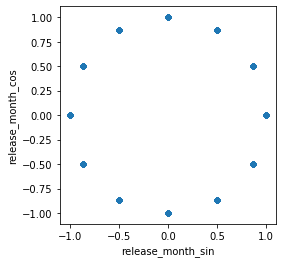

In [112]:
## Encoding month
release_dates = encode(release_dates, 'release_month', 12)
ax = release_dates.plot.scatter('release_month_sin', 'release_month_cos').set_aspect('equal')

In [20]:
# ## Encoding day
# release_dates = encode(release_dates, 'release_day', 31)
# ax = release_dates.plot.scatter('release_day_sin', 'release_day_cos').set_aspect('equal')

In [113]:
## Years since
years_since = release_dates.release_year.rank(method='dense', ascending=False)
release_dates['release_years_ago'] = years_since

In [114]:
#release_dates["release_weekday"].value_counts()

In [115]:
# #dummies for days of week
# weekday_dummies = pd.get_dummies(release_dates["release_weekday"], prefix='release')
# weekday_dummies = weekday_dummies.drop('release_Monday', axis=1)

In [116]:
month_dummies = pd.get_dummies(release_dates["release_month_name"], prefix='release')
month_dummies = month_dummies.drop('release_March', axis=1)

In [117]:
release_dates = pd.concat([release_dates], axis=1)
release_dates

,release_year,release_month,release_month_name,days_since,release_month_sin,release_month_cos,release_years_ago
0,2000,11,November,6937,-5.000000e-01,0.866025,20.0
1,1999,4,April,7517,8.660254e-01,-0.500000,21.0
2,2003,5,May,6026,5.000000e-01,-0.866025,17.0
3,2001,6,June,6725,1.224647e-16,-1.000000,19.0
4,1999,11,November,7303,-5.000000e-01,0.866025,21.0
...,...,...,...,...,...,...,...
27070,2019,4,April,189,8.660254e-01,-0.500000,1.0
27071,2019,4,April,190,8.660254e-01,-0.500000,1.0
27072,2019,4,April,189,8.660254e-01,-0.500000,1.0
27073,2019,4,April,196,8.660254e-01,-0.500000,1.0


In [118]:
release_dates = release_dates.drop(['release_month_name', 'release_month'], axis=1)

## Estimated Revenue: Owners * Price

In [119]:
df.owners.value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [120]:
owners = df.owners.str.split('-')
list_owners = [list(map(int, x)) for x in owners]
## Mean owners
mean_owners = [np.mean(i) for i in list_owners]

In [121]:
# Est. Revenue 
estimated_revenue = mean_owners * df.price
estimated_revenue = estimated_revenue.rename('estimated_revenue')

## Price

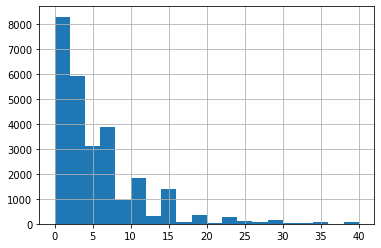

In [122]:
df[df['price']<40].price.hist(bins=20)

In [123]:
df[df['price']<41].shape

(26960, 388)

## Price Categories
* free = 0
* very_cheap > 5
* cheap > 10
* average_price > 20
* slightly_expensive > 40
* expensive > 100
* very_expensive < 100

In [124]:
prices_categorical = pd.cut(df.price, [-float('inf'),0,5,10,20,40,100,450], labels=['free','very_cheap', 'cheap', 'avg_price', 'slightly_expensive', 'expensive', 'very_expensive'])
## Counting by categorical values
prices_categorical.value_counts()

very_cheap            13293
cheap                  6300
avg_price              3999
free                   2560
slightly_expensive      808
expensive               104
very_expensive           11
Name: price, dtype: int64

In [125]:
##Dropping Free
prices_dummies = pd.get_dummies(prices_categorical)
prices_dummies.head(3)

price,free,very_cheap,cheap,avg_price,slightly_expensive,expensive,very_expensive
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0


## Categories

Need to separate list of strings into dummies, then reduce to a lower amount of columns

In [126]:
df.categories.head(3)

0    Multi-player;Online Multi-Player;Local Multi-P...
1    Multi-player;Online Multi-Player;Local Multi-P...
2                Multi-player;Valve Anti-Cheat enabled
Name: categories, dtype: object

In [127]:
categories_dummies = df.categories.str.get_dummies(';')
categories_dummies.shape

(27075, 29)

In [128]:
#Reducing amount of columns 
categories_dummies = categories_dummies.loc[:, (categories_dummies).sum() > 50]
print(categories_dummies.shape)
categories_dummies.head(3)

(27075, 25)


,Captions available,Co-op,Commentary available,Cross-Platform Multiplayer,Full controller support,In-App Purchases,Includes level editor,Local Co-op,Local Multi-Player,MMO,Multi-player,Online Co-op,Online Multi-Player,Partial Controller Support,Shared/Split Screen,Single-player,Stats,Steam Achievements,Steam Cloud,Steam Leaderboards,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,VR Support,Valve Anti-Cheat enabled
0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Developers and Publishers

In [129]:
print("Number of unique developers: ", df.developer.nunique())

Number of unique developers:  17113


In [130]:
print("Number of unique publishers: ", df.publisher.nunique())

Number of unique publishers:  14354


# ADDING ALL DUMMIES AND CATEGORICAL COLUMNS

In [131]:
new_cols = pd.concat([platform_dummies, age_required_dummies, estimated_revenue, prices_dummies, categories_dummies], axis=1)
new_cols.shape

(27075, 40)

In [132]:
release_dates.shape

(27075, 5)

In [133]:
df.shape

(27075, 388)

In [134]:
drop_cols = ['release_date', 'developer', 'publisher', 'platforms', 'categories', 'steamspy_tags', 'owners']
df = df.drop(drop_cols, axis=1)

In [135]:
final_df = pd.concat([df.iloc[:,:10], new_cols, release_dates, df.iloc[:,10:]], axis=1)
final_df.shape

(27075, 426)

In [136]:
final_df.columns = final_df.columns.str.lower()

In [137]:
final_df

,appid,name,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,mac,windows,required_age_3,required_age_7,required_age_12,required_age_16,required_age_18,estimated_revenue,free,very_cheap,cheap,avg_price,slightly_expensive,expensive,very_expensive,captions available,co-op,commentary available,cross-platform multiplayer,full controller support,in-app purchases,includes level editor,local co-op,local multi-player,mmo,multi-player,online co-op,online multi-player,partial controller support,shared/split screen,single-player,stats,steam achievements,steam cloud,steam leaderboards,steam trading cards,steam turn notifications,steam workshop,vr support,valve anti-cheat enabled,release_year,days_since,release_month_sin,release_month_cos,release_years_ago,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,4x,6dof,atv,abstract,action,action_rpg,action_adventure,addictive,adventure,agriculture,aliens,alternate_history,america,animation_&_modeling,anime,arcade,arena_shooter,artificial_intelligence,assassin,asynchronous_multiplayer,atmospheric,audio_production,bmx,base_building,baseball,based_on_a_novel,basketball,batman,battle_royale,beat_em_up,beautiful,benchmark,bikes,blood,board_game,bowling,building,bullet_hell,bullet_time,crpg,capitalism,card_game,cartoon,cartoony,casual,cats,character_action_game,character_customization,chess,choices_matter,choose_your_own_adventure,cinematic,city_builder,class_based,classic,clicker,co_op,co_op_campaign,cold_war,colorful,comedy,comic_book,competitive,conspiracy,controller,conversation,crafting,crime,crowdfunded,cult_classic,cute,cyberpunk,cycling,dark,dark_comedy,dark_fantasy,dark_humor,dating_sim,demons,design_&_illustration,destruction,detective,difficult,dinosaurs,diplomacy,documentary,dog,dragons,drama,driving,dungeon_crawler,dungeons_&_dragons,dynamic_narration,dystopian_,early_access,economy,education,emotional,epic,episodic,experience,experimental,exploration,fmv,fps,faith,family_friendly,fantasy,fast_paced,feature_film,female_protagonist,fighting,first_person,fishing,flight,football,foreign,free_to_play,funny,futuristic,gambling,game_development,gamemaker,games_workshop,gaming,god_game,golf,gore,gothic,grand_strategy,great_soundtrack,grid_based_movement,gun_customization,hack_and_slash,hacking,hand_drawn,hardware,heist,hex_grid,hidden_object,historical,hockey,horror,horses,hunting,illuminati,indie,intentionally_awkward_controls,interactive_fiction,inventory_management,investigation,isometric,jrpg,jet,kickstarter,lego,lara_croft,lemmings,level_editor,linear,local_co_op,local_multiplayer,logic,loot,lore_rich,lovecraftian,mmorpg,moba,magic,management,mars,martial_arts,massively_multiplayer,masterpiece,match_3,mature,mechs,medieval,memes,metroidvania,military,mini_golf,minigames,minimalist,mining,mod,moddable,modern,motocross,motorbike,mouse_only,movie,multiplayer,multiple_endings,music,music_based_procedural_generation,mystery,mystery_dungeon,mythology,nsfw,narration,naval,ninja,noir,nonlinear,nudity,offroad,old_school,on_rails_shooter,online_co_op,open_world,otome,parkour,parody_,party_based_rpg,perma_death,philisophical,photo_editing,physics,pinball,pirates,pixel_graphics,platformer,point_&_click,political,politics,pool,post_apocalyptic,procedural_generation,programming,psychedelic,psychological,psychological_horror,puzzle,puzzle_platformer,pve,pvp,quick_time_events,rpg,rpgmaker,rts,racing,real_time_tactics,real_time,real_time_with_pause,realistic,relaxing,remake,replay_value,resource_management,retro,rhythm,robots,rogue_like,rogue_lite,romance,rome,runner,sailing,sandbox,satire,sci_fi,science,score_attack,sequel,sexual_content,shoot_em_up,shooter,short,side_scroller,silent_protagonist,simulation,singleplayer,skateboarding,skating,skiing,sniper,snow,snowboarding,soccer,software,software_training,sokoban,souls_like,soundtrack,space,space_sim,spectacle_fighter,spelling,split_screen,sports,star_wars,stealth,ste

In [138]:
final_df.to_csv('cleaned_df.csv', index=False)